In [37]:
%reload_ext sparkmagic.magics

In [38]:
%manage_spark

MagicsControllerWidget(children=(Tab(children=(ManageSessionWidget(children=(HTML(value='<br/>'), HTML(value='…

In [39]:
%manage_spark

MagicsControllerWidget(children=(Tab(children=(ManageSessionWidget(children=(HTML(value='<br/>'), HTML(value='…

In [40]:
%%configure -f
{
    "driverMemory": "4G",
    "executorCores": 2,
    "executorMemory": "2G",
    "numExecutors": 1,
    "queue": "default",
    "kind": "pyspark"
}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
5,None,spark,idle,,,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
5,None,spark,idle,,,None,✔


In [41]:
%%local
import altair as alt
alt

<module 'altair' from '/Users/mpandit/Desktop/code/li-projects/darwin-tabular-analysis_trunk/3.7/lib/python3.7/site-packages/altair/__init__.py'>

In [42]:
%%local
alt.__version__

'4.1.0'

In [43]:
%%local
from vega_datasets import data

source = data.seattle_weather()

In [44]:
%%local
alt.renderers.enable('jupyterlab')
scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('weather:N', scale=scale)

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])

# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    alt.X('monthdate(date):T', title='Date'),
    alt.Y('temp_max:Q',
        title='Maximum Daily Temperature (C)',
        scale=alt.Scale(domain=[-5, 40])
    ),
    color=alt.condition(brush, color, alt.value('lightgray')),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[5, 200]))
).properties(
    width=550,
    height=300
).add_selection(
    brush
).transform_filter(
    click
)


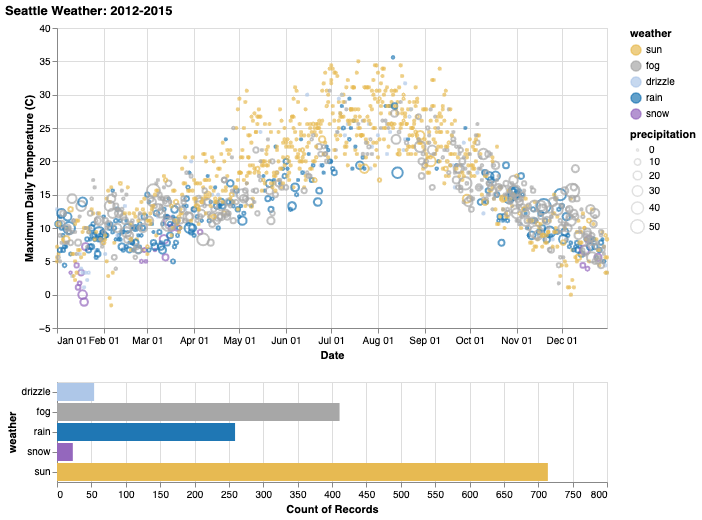

In [45]:
%%local
# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='weather:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=550,
).add_selection(
    click
)

alt.vconcat(
    points,
    bars,
    data=source,
    title="Seattle Weather: 2012-2015"
)